In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import matplotlib.pyplot as plt
import json

from pathlib import Path

In [3]:
import sys
sys.path.insert(0, './../')

In [4]:
from references_detection import coco_utils

In [5]:
from src.test_tools import test_model_on_dataset, get_model_prediction_one_image, test_models
from src.visualization_tools import show_instance_segmentation_by_model_predictions
from src.model import get_model_instance_segmentation
from src.visualization_tools import show_coco_dataset_item, get_float_image, show_img, draw_bar_hist

## Сравнение метрик

In [21]:
metrics_ap_segm = ['AP(segm)/IoU=0.5:0.95', 'AP(segm)/IoU=0.5', 'AP(segm)/IoU=0.75', 'AP(segm)/small', 'AP(segm)/medium', 'AP(segm)/large']
metrics_ap_box = ['AP(bbox)/IoU=0.5:0.95', 'AP(bbox)/IoU=0.5', 'AP(bbox)/IoU=0.75', 'AP(bbox)/small', 'AP(bbox)/medium', 'AP(bbox)/large']
metrics_ar_segm = ['AR(segm)/maxDets=1', 'AR(segm)/maxDets=10', 'AR(segm)/maxDets=100', 'AR(segm)/small', 'AR(segm)/medium', 'AR(segm)/large']
metrics_ar_box = ['AR(bbox)/maxDets=1', 'AR(bbox)/maxDets=10', 'AR(bbox)/maxDets=100', 'AR(bbox)/small', 'AR(bbox)/medium', 'AR(bbox)/large']

In [22]:
def get_dict_by_json(json_file):
    with open(json_file) as f:
        return json.load(f)

In [23]:
def get_metrics_values(results_dict, model_tag, dataset_tag, metrics):
    return [x[1] for x in results_dict[model_tag][dataset_tag]['metrics'].items() if x[0] in metrics]

In [24]:
mask_rcnn_d = get_dict_by_json(Path('./../results/mask_rcnn/results.json'))
trained_model_d = get_dict_by_json(Path('./../results/mask_rcnn_cityscapes_training_adam/results.json'))
trained_model_d_2 = get_dict_by_json(Path('./../results/mask_rcnn_cityscapes_training_2/results.json'))

In [25]:
dataset_tag = 'cityscapes_dataset'
mask_rcnn_tag = 'mask_rcnn'
trained_model_tag = 'mask_rcnn_cityscapes_training_adam_7'
trained_model_tag_2 = 'mask_rcnn_cityscapes_training_2_4'
ap_segm_values_mask_rcnn = get_metrics_values(mask_rcnn_d, mask_rcnn_tag, dataset_tag, metrics_ap_segm)
ap_segm_values_trained = get_metrics_values(trained_model_d, trained_model_tag, dataset_tag, metrics_ap_segm)
ap_segm_values_trained_2 = get_metrics_values(trained_model_d_2, trained_model_tag_2, dataset_tag, metrics_ap_segm)
ar_segm_values_mask_rcnn = get_metrics_values(mask_rcnn_d, mask_rcnn_tag, dataset_tag, metrics_ar_segm)
ar_segm_values_trained = get_metrics_values(trained_model_d, trained_model_tag, dataset_tag, metrics_ar_segm)
ar_segm_values_trained_2 = get_metrics_values(trained_model_d_2, trained_model_tag_2, dataset_tag, metrics_ar_segm)

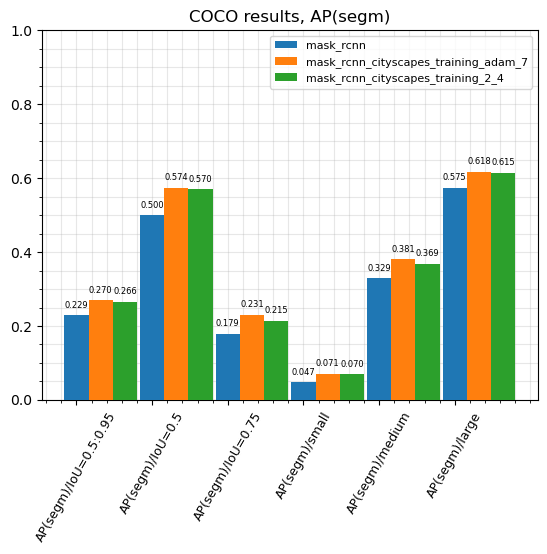

In [35]:
draw_bar_hist({mask_rcnn_tag : ap_segm_values_mask_rcnn, \
               trained_model_tag: ap_segm_values_trained, \
               trained_model_tag_2: ap_segm_values_trained_2}, \
                metrics_ap_segm, 'COCO results, AP(segm)')
plt.show()

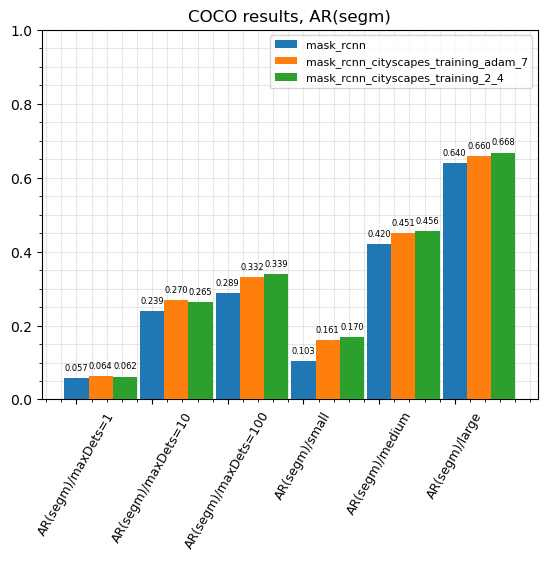

In [36]:
draw_bar_hist({mask_rcnn_tag: ar_segm_values_mask_rcnn, \
               trained_model_tag: ar_segm_values_trained, \
               trained_model_tag_2: ar_segm_values_trained_2}, \
                metrics_ar_segm, 'COCO results, AR(segm)')
plt.show()